## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [7]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [11]:
np.random.rand(5) < 0.51 # Random number is less than the true fraction we will get True and False for Brown and Green respectively.

array([ True, False,  True,  True, False])

In [27]:
# This function lets me generate a random sample set of 1000 data points for votes.
def sample(brown, n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [28]:
s = sample(0.51, n=1000)

In [31]:
s.vote.value_counts(normalize=True)
# Observation: In this sample Brown is under the level of winning the elections. However, his true fraction is 0.51.

Green    0.503
Brown    0.497
Name: vote, dtype: float64

In [33]:
# Here we are repeating the random sampling many times and collect the results in the DataFrame
# ie. In the below code we are executing 1000 simulated experiments for sampling.
dist = pd.DataFrame(sample(0.51).vote.value_counts(normalize=True) for _ in range(1000)) 

In [35]:
dist.head()

,Brown,Green
vote,0.511,0.489
vote,0.499,0.501
vote,0.532,0.468
vote,0.505,0.495
vote,0.499,0.501


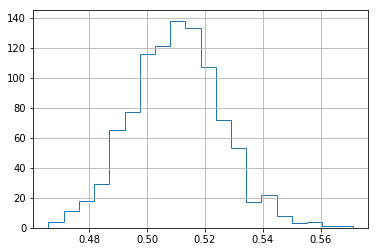

In [36]:
dist.Brown.hist(histtype='step', bins=20)